w> # Chapter 11. Testing Hypotheses
---



### 1. Assessing Models 


### 2. Multiple Categories 


### 3. Decisions and Uncertainty



In [0]:
# HIDDEN
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

+ 많은 데이터 과학 작업은 다음과 같이 관찰에 대한 '예/아니오' 질문을 받는다.

 - 초콜렛은 몸에 좋은가?

 - Broad Street 펌프 수도물이 콜레라를 일으켰는가?

 - 캘리포니아 인구통계가 지난 10년가 바뀌었는가?
 
+ 지난 시간 배운
random sample과 empirical distribution을 바탕으로 답을 찾는 과정을 배워 보자. 

+ "Model"
 - A set of assumptions about data
 - Good or not?
+ 두 예제
 - 미국 대법원 판결
 - 멘델의 콩 유전법칙

> U.S. Supreme Court, 1965: Swain vs. Alabama
---
+ 1960년대 한 흑인남성 Robert Swain이 백인여성을 강간한 죄로 사형선고를 받은 사건이 있었음.
+ 그런데 배심원단 구성에 이의를 제기.
 - 그 지역 21세이상 배심원후보 적격자 중 26%가 흑인
 - 하지만 100명의 배심원패널 중 겨우 8명의 흑인이 포함
 - 최종 배심원단에는 한 명의 흑인도 포함되지 않음
+ 미국대법원은 문제가 없다고 발표

+ Model
 - 배심원패널은 랜덤하게 선택되었다 (대법원 주장처럼)
+ 앞서 배운 내용을 이용하여 이 model을 검증해 보자.

+ Statistic (통계값)
 - 100몀의 배심원패널을 랜덤하게 선택했을 때, 포함된 흑인의 수
 - 8이 너무 작은 게 아니라면 : Model is good. (모델 채택)
 - 8이 너무 작다면 : Model is not good. (모델 기각)
+ 지난 장에서 배운 Table().sample()을 사용할 수 있지만 구현에 비효율적
+ 카테고리 비율로부터 랜덤하게 샘플링하는 sample_proportions 함수를 사용하자.

In [2]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [3]:
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)

array([0.29, 0.71])

+ 따라서 우리가 원하는 statistic 을 다음과 같이 구할 수 있다.

In [4]:
# count of black men in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)


28.999999999999996

+ 반복실행을 통해 분포를 조사해 보자.

In [0]:
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    simulated_count = (100 * sample_proportions(100, eligible_population)).item(0)
    counts = np.append(counts, simulated_count)
    

In [0]:
counts_table = Table().with_column(
    'Count in a Random Sample', counts
)

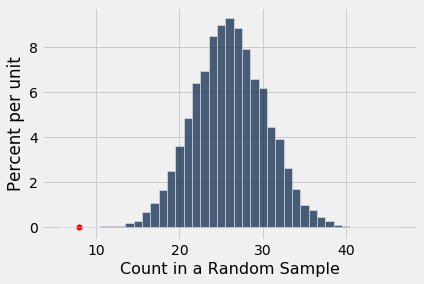

In [7]:
counts_table.hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, 0, color='red', s=30); # 실제값과 비교를 위해

+ 배심원패널이 __랜덤__하게 뽑혔다고 보기 어렵다.


> Mendel's Pea Flowers
---
+ 관찰
 - 929개 나무를 심어 705개 나무에서 자주색 꽃이 피었다.
+ Model
 - 자주색 꽃이 필 확률 75%, 흰 색 꽃이 필 확률이 25%이다.
+ Statistic
 - 자주색 꽃이 핀 sample % 와 75% 사이의 차이

In [8]:
model_proportions = [0.75, 0.25]
abs(100 * sample_proportions(929, model_proportions).item(0) - 75)

2.395048439181906

In [0]:
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs(100 * sample_proportions(929, model_proportions).item(0) - 75)
    distances = np.append(distances, one_distance)


In [10]:
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

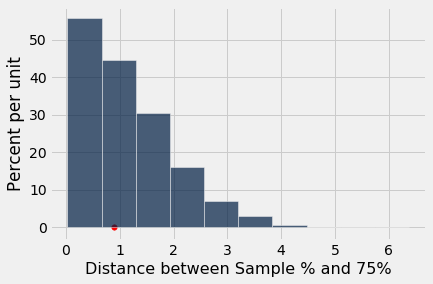

In [11]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.scatter(observed_statistic, 0, color='red', s=30); # 실제값과 비교를 위해

- Mendel's Model is good.

> ### Multiple Categories
---
+ Category 가 여러개인 경우
 - 앞에서처럼 statistic을 정하고 random sample의 분포와 비교한다는 점에서 비슷
+ 미국대법원 판결 예를 확장하여 다시 살펴 보자.(2009년 2010년 ACLU 지역)
 - 배심원후보 인종별 비율과
 - 1453명의 배심원패널 인종별 비율을 살펴 보자.


In [12]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


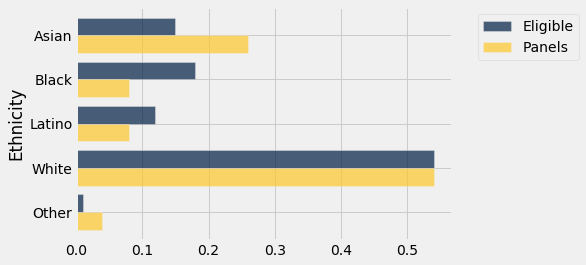

In [13]:
jury.barh('Ethnicity')


+ Model
 - 1453명을 랜덤하게 뽑았으며 Panels 분포는 그 중에 있다.

In [14]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.15967
Black,0.18,0.08,0.161046
Latino,0.12,0.08,0.116999
White,0.54,0.54,0.556091
Other,0.01,0.04,0.00619408


+ Statistic은 무엇으로 하면 좋을까?

+ The Distance between Two Distributions 을 사용하자.


In [15]:
jury_with_diffs = jury.with_column(
    'Absolute Difference', np.abs(jury.column('Panels') - jury.column('Eligible'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Absolute Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,0.1
Latino,0.12,0.08,0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


+ Total variation distance (TVD)
 - 두 distribution 사이의 차이

In [16]:
observed_statistic = jury_with_diffs.column('Absolute Difference').sum()/2
observed_statistic

0.14

In [0]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [0]:
# Simulate total variation distance between
# distribution of sample selected at random
# and distribution of eligible population

eligible_population = jury.column('Eligible')
panel_size = 1453

tvds = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(panel_size, eligible_population)
    new_tvd = total_variation_distance(sample_distribution, eligible_population)
    tvds = np.append(tvds, new_tvd)


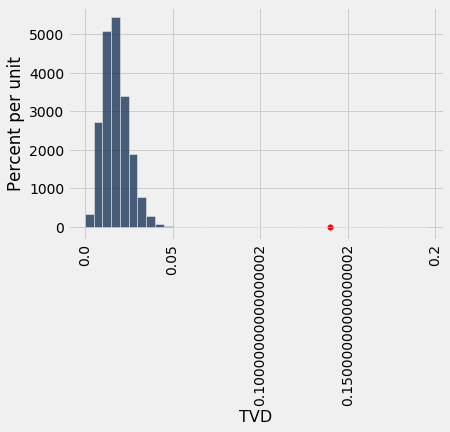

In [19]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))
plots.scatter(observed_statistic, 0, color='red', s=30); # 실제값과 비교를 위해

+ 해당 Model은 관찰결과를 지지하지 못한다.
+ (물론, 실제 주어진 데이터에 대한 검증이 필요하다. 영어가능자, 운전면허소지자 등)

> ### Decisions and Uncertainty
---
+ 지금까지 model assessement의 사례를 살펴보았다.
 - observed_statistic과 model (주로 random sample)에 의한 distribution을 비교
+ 너무 차이가 크면 model이 설명하지 못한다고 볼 수 있다.
+ 그런데, 차이가 큰 지는 어떻게 판단해야 하나?

> Step 1: The Hypotheses
---
+ The null hypothesis (독립가설)
 - Data는 random하게 생성되었다.
 - 결국 시뮬레이션하는 대상이 됨
+ The alternative hypothesis (귀무가설)
 - Data는 null hypothesis로부터 생성되지 않았다.


> Step 2: The Test Statistic
---
+ simulated statistic vs. observed statistic

> Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis
---
+ The null hypothesis를 따라 simulated statistic의 분포를 구한다.

> Step 4. The Conclusion of the Test
---
+ 둘 사이에 일관성이 있다면
 - 데이터가 The null hypothesis를 지지한다.
+ 만약 그렇지 않다면
 - The nully hypothesis는 ___reject___ 된다.

> Another Example
---
+ 통계학과 359명을 12개 분반으로 랜덤하게 나누고 시험점수를 조사
+ 3분반의 점수가 다소 낮아서 랜덤하게 나눈 건지 의문스럽다.
+ Null Hypothes
 - 3분반의 평균점수는 랜덤하게 뽑힌 경우와 비슷하다. 
+ Alternative Hypothesis
 - 3분반의 평균점수는 랜덤하게 뽑힌 경우보다 낮다.
+ 다음 데이터를 사용하자.

In [20]:
scores = Table.read_table('scores_by_section.csv')
scores

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [21]:
section_averages = scores.group('Section', np.average)
section_averages.show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


+ Observed statistic은 13.6667이다.
+ 랜덤하게 뽑을 학생수를 확인하자.

In [22]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


+ simulated statistic
 - 랜덤하게 27명을 뽑았을 때 평균점수

In [0]:
averages = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sampled_scores = scores.sample(27, with_replacement=False).drop('Section')
    averages = np.append(averages, np.average(sampled_scores.column('Midterm')))

참고) 
+ with_replacement=True (교체 포함) : 중복 가능
+ with_replacement=False (교체 불포함) : 중복 불가능

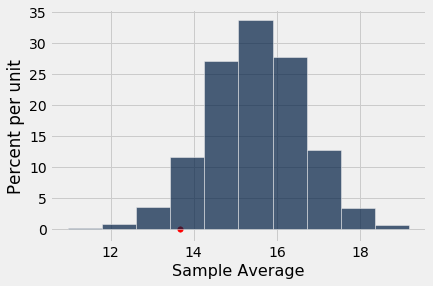

In [24]:
sample_averages = Table().with_column('Sample Average', averages)
sample_averages.hist()

observed_statistic = 13.667
plots.scatter(observed_statistic, 0, color='red', s=30);

+ 이 결과는 Model (Null hypothesis)과 일치하는가?
+ 근본적으로 해석하는 본인이 결정한다.


+ 다만 다음과 같은 p-value를 제공할 수 있다.

In [25]:
np.count_nonzero(averages <= observed_statistic)/repetitions

0.0608

+ p-value
 - observed significance level of the test
 - < 0.05 : statistically signficant 하다.
 - < 0.01 : highly statistically signficant 하다.
+ Sir Ronald Fisher (1925) _Statistical Methods for Research Workers_


> ### Recap
---

+ Model Assessment
 - sample_proportions() 함수 사용
 - 두 집단 사이에 발생한 비율이 랜덤한가?

+ Multiple Categories
 - 여러 카테고리인 경우 total variation distance를 측정

+ Decisions and Uncertainty
 - null hypothesis
 - Test Statistic
 - The Distribution of the Test Statistic, Under the Null Hypothesis
 - The Conclusion of the Test
 - p-value